# 1

## a

In [1]:
%%latex

\begin{gather*}
\frac{d^2\phi(x)}{dx^2} - \frac{\Sigma_a}{D}\phi(x) = -\frac{S(x)}{D}\\
\phi(a) = \phi(-a) = 0\\
\frac{d^2\phi(x)}{dx^2} - \frac{\Sigma_a}{D}\phi(x) = 0\\
\phi(x) = Ae^{\sqrt{\frac{\Sigma_a}{D}}x} + Be^{-\sqrt{\frac{\Sigma_a}{D}}x}\\
Ae^{\sqrt{\frac{\Sigma_a}{D}}a} + Be^{-\sqrt{\frac{\Sigma_a}{D}}a} = 0\\
Ae^{-\sqrt{\frac{\Sigma_a}{D}}a} + Be^{\sqrt{\frac{\Sigma_a}{D}}a} = 0\\
A = B = 0\\
\phi(x) = 0\\
\end{gather*}

<IPython.core.display.Latex object>

## b

In [2]:
%%latex

\begin{gather*}
\frac{d^2\phi(x)}{dx^2} - \frac{\Sigma_a}{D}\phi(x) = -\frac{S(x)}{D}\\
\phi(a) = \phi(-a) = 0\\
\frac{d^2\phi(x)}{dx^2} - \frac{\Sigma_a}{D}\phi(x) = -\frac{S_0}{D}\\
\phi(x) = Ae^{\sqrt{\frac{\Sigma_a}{D}}x} + Be^{-\sqrt{\frac{\Sigma_a}{D}}x} + \frac{S_0}{\Sigma_a}\\
Ae^{\sqrt{\frac{\Sigma_a}{D}}a} + Be^{-\sqrt{\frac{\Sigma_a}{D}}a} + \frac{S_0}{\Sigma_a} = 0\\
Ae^{-\sqrt{\frac{\Sigma_a}{D}}a} + Be^{\sqrt{\frac{\Sigma_a}{D}}a} + \frac{S_0}{\Sigma_a} = 0\\
A = B = -\frac{S_0}{2\Sigma_a\cosh\left(\sqrt{\frac{\Sigma_a}{D}}a\right)}\\
\phi(x) = \frac{S_0}{\Sigma_a}\left(1 - \frac{\cosh\left(\sqrt{\frac{\Sigma_a}{D}}x\right)}{\cosh\left(\sqrt{\frac{\Sigma_a}{D}}a\right)}\right)
\end{gather*}

<IPython.core.display.Latex object>

## c

In [3]:
%%latex

\begin{gather*}
\frac{d^2\phi(x)}{dx^2} - \frac{\Sigma_a}{D}\phi(x) = -\frac{S(x)}{D}\\
\phi(a) = \phi(-a) = 0\\
\frac{d^2\phi(x)}{dx^2} - \frac{\Sigma_a}{D}\phi(x) = -\frac{\cos(x)}{D}\\
\phi(x) = Ae^{\sqrt{\frac{\Sigma_a}{D}}x} + Be^{-\sqrt{\frac{\Sigma_a}{D}}x} + C\cos(x)\\
C\frac{d^2\cos(x)}{dx^2} - C\frac{\Sigma_a}{D}\cos(x) = -\frac{\cos(x)}{D}\\
-1 - \frac{\Sigma_a}{D} = -\frac{1}{DC}\\
C = \frac{1}{D + \Sigma_a}\\
\phi(x) = Ae^{\sqrt{\frac{\Sigma_a}{D}}x} + Be^{-\sqrt{\frac{\Sigma_a}{D}}x} + \frac{1}{D+\Sigma_a}\cos(x)\\
Ae^{\sqrt{\frac{\Sigma_a}{D}}a} + Be^{-\sqrt{\frac{\Sigma_a}{D}}a} + \frac{1}{D+\Sigma_a}\cos(a) = 0\\
Ae^{-\sqrt{\frac{\Sigma_a}{D}}a} + Be^{\sqrt{\frac{\Sigma_a}{D}}a} + \frac{1}{D+\Sigma_a}\cos(-a) = 0\\
A = B = -\frac{\cos(a)}{2(D+\Sigma_a)\cosh\left(\sqrt{\frac{\Sigma_a}{D}}a\right)}\\
\phi(x) = \frac{1}{D+\Sigma_a}\left(\cos(x)-\cos(a)\frac{\cosh\left(\sqrt{\frac{\Sigma_a}{D}}x\right)}{\cosh\left(\sqrt{\frac{\Sigma_a}{D}}a\right)}\right)
\end{gather*}

<IPython.core.display.Latex object>

# 2

In [4]:
a = 4 # cm
D = 1 # cm
Sigma_a = 0.2 # cm^−1
S = 8 # n/(cm^3 s)

def fixedSource(h):

    q = Sigma_a / D #coefficient of phi
    r = -S / D #constant term
    n = int(2*a / h) #number of cells

    diag_r = [-1 / (2 + h**2*q)] + [-1]*(n-3) #right diagonal
    b = [-h**2*r / (2 + h**2*q)] + [-h**2*r]*(n-2) #right-side vector

    #Thomas algorithm
    for i in range(1, n-2):
        diag_r[i] = diag_r[i] / (2 + h**2*q + diag_r[i-1])
        b[i] = (b[i] + b[i - 1]) / (2 + h**2*q + diag_r[i-1])

    b[n-2] = (b[n-2] + b[n-3]) / (2 + h**2*q + diag_r[n-3])
    
    phi = [0]*(n+1) #solution for flux

    phi[n-1] = b[n-2]
    for i in range(n-3, -1, -1):
        phi[i+1] = b[i] - diag_r[i]*phi[i+2]

    return phi

Populating the interactive namespace from numpy and matplotlib


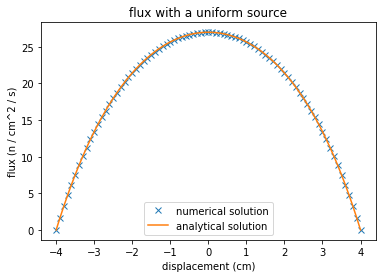

In [5]:
%pylab inline

def fixedSourceAnalytical(x):
    return S / Sigma_a * (1 - cosh((Sigma_a/D)**.5*x)/cosh((Sigma_a/D)**.5*a))

phi_numerical = fixedSource(0.1)
space = linspace(-a, a, int(2*a/0.1)+1)
phi_analytical = [fixedSourceAnalytical(x) for x in space]

pyplot.plot(space, phi_numerical, 'x', label='numerical solution')
pyplot.plot(space, phi_analytical, label='analytical solution')
pyplot.legend(loc='best')
pyplot.xlabel('displacement (cm)')
pyplot.ylabel('flux (n / cm^2 / s)')
pyplot.title('flux with a uniform source')

# 3

Populating the interactive namespace from numpy and matplotlib


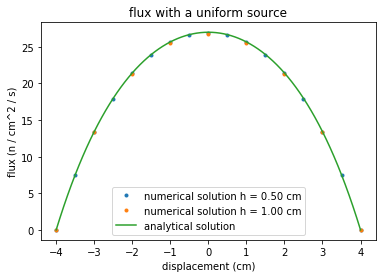

In [6]:
%pylab inline

h_vals = [0.01, 0.05, 0.1, 0.5, 1]

numerical_sols = []

for h in h_vals:
    numerical_sols += [fixedSource(h)]
    if a/h < 20:
        pyplot.plot(linspace(-a, a, int(2*a/h)+1), numerical_sols[-1], '.', label='numerical solution h = %.2f cm'%h)

pyplot.plot(space, phi_analytical, label='analytical solution')
pyplot.legend(loc='best')
pyplot.xlabel('displacement (cm)')
pyplot.ylabel('flux (n / cm^2 / s)')
pyplot.title('flux with a uniform source')

Populating the interactive namespace from numpy and matplotlib


/home/ablank/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


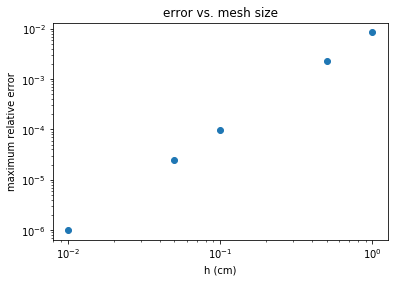

In [7]:
%pylab inline

def maxRelError(num_sol):
    h = 2*a / (len(num_sol)-1)
    return max(abs(num_sol[i] / fixedSourceAnalytical(-a+i*h) - 1) for i in range(1, len(num_sol)))

errors = list(map(maxRelError, numerical_sols))

pyplot.loglog(h_vals, errors, 'o')
pyplot.xlabel('h (cm)')
pyplot.ylabel('maximum relative error')
pyplot.title('error vs. mesh size')

Populating the interactive namespace from numpy and matplotlib


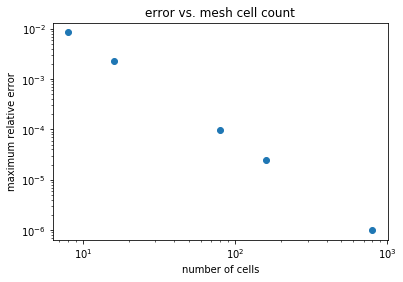

In [8]:
% pylab inline

pyplot.loglog(list(map(lambda h: 2*a/h, h_vals)), errors, 'o')

pyplot.xlabel('number of cells')
pyplot.ylabel('maximum relative error')
pyplot.title('error vs. mesh cell count')

The plot shows an inverse square relationship between the maximum relative eroor and the number of mesh cells. This is consistent with the error in the central difference method being $O(h^2)$

# 4

In [9]:
%pylab inline

def Gauss_Seidel(A, b, x_0 = None, tolerance = 1e-6, toleranceType = 'abs'):
    if x_0 == None:
        x_0 = zeros(shape(b))
    
    n = shape(b)[0]
    x = copy(x_0)
    
    iterations = 0
    err = tolerance+1
    
    while (err > tolerance and iterations < 1000):
        err_sq = 0
        for i in range(n):
            prev = x[i][0]
            x[i][0] = (b[i][0] - sum(A[i][j]*x[j][0] for j in range(n) if i != j)) / A[i][i]
            err_sq += (x[i][0] - prev)**2
        
        err = err_sq**.5
        if (toleranceType in ['rel', 'relative']):
            err /= norm(x)
        
        iterations += 1
        
    
    return x, iterations, err


def SOR(A, b, omega, x_0 = None, tolerance = 1e-6, toleranceType = 'abs'):
    if x_0 == None:
        x_0 = zeros(shape(b))
    
    n = shape(b)[0]
    x = copy(x_0)
    
    iterations = 0
    err = tolerance+1
    
    while (err > tolerance and iterations < 1000):
        err_sq = 0
        for i in range(n):
            prev = x[i][0]
            x[i][0] = (1-omega)*x[i][0] + omega*(b[i][0] - sum(A[i][j]*x[j][0] for j in range(n) if i != j)) / A[i][i]
            err_sq += (x[i][0] - prev)**2
        
        err = err_sq**.5
        if (toleranceType in ['rel', 'relative']):
            err /= norm(x)
        
        iterations += 1
        
    
    return x, iterations, err

Sigma_a = 0.7 # cm^−1
nu_Sigma_f = 0.6 # cm^−1
h = 0.1 # cm

#absolute error tolerance
tol_k = 1e-4
tol_phi = 1e-4 # n / cm^2 / s

n = int(2*a/h) #number of cells

phi = array([[n**-0.5] for i in range(n)]) #normalized uniform flux initial guess

Q =  [[nu_Sigma_f * phi[i][0]] for i in range(n)] #fission source for phi

k = 1.1 #initial guess

#matrix corresponding to finite difference discretization of diffusion equation
A = [[2*D/h**2 + Sigma_a, -D/h**2]+[0]*(n-2)]+[[0]*j + [-D/h**2, 2*D/h**2 + Sigma_a, -D/h**2] + [0]*(n-j-3) for j in range(n-2)]+[[0]*(n-2)+[-D/h**2, 2*D/h**2 + Sigma_a]]

iterations = 0

err_k = tol_k + 1

while (err_k > tol_k and iterations < 40):
    phi_new = SOR(A, Q, 1.12, phi, tol_phi)[0]
    Q_new =  [[nu_Sigma_f * phi[i][0]] for i in range(n)]
    k_new = sum(Q_new) / sum(Q)
    err_k = abs(k_new - k)
    k = k_new
    phi = phi_new / sqrt(sum(phi_new[i][0] for i in range(n))) #normalize phi
    Q = Q_new
    iterations += 1

Populating the interactive namespace from numpy and matplotlib


/home/ablank/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Populating the interactive namespace from numpy and matplotlib


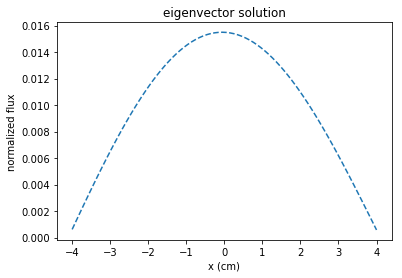

In [10]:
%pylab inline

pyplot.plot(linspace(-a, a, int(2*a/h)), phi, '--')

pyplot.xlabel('x (cm)')
pyplot.ylabel('normalized flux')
pyplot.title('eigenvector solution')

In [12]:
print('iterations:', iterations)
print('k:', k)

iterations: 20
k: 0.999575720364
